In [9]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
y0 = 2 * [1] + 4 * [0]
y1 = 2 * [0] + 2 * [1] + 2 * [0]
y2 = 4 * [0] + 2 * [1]

print(y0)
print(y1)
print(y2)

[1, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1]


In [11]:
y_one_hot = np.stack([y0, y1, y2], axis=1)
y_one_hot

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [12]:
# This is it!
print('y_one_hot.shape = ', y_one_hot.shape)
num_thresh = 4
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)

page_one = 0
page_two = 1
page_three = 2

print('-----------------')
print('page_one.shape =', y_oh_3d[:,:, page_one].shape)
print('page_one = \n', y_oh_3d[:,:, page_one])
print('-----------------')
print('page_two.shape =', y_oh_3d[:,:, page_two].shape)
print('page_two = \n', y_oh_3d[:,:, page_two])
print('-----------------')
print('page_three.shape =', y_oh_3d[:,:, page_three].shape)
print('page_three = \n', y_oh_3d[:,:, page_three])
print('-----------------')

y_one_hot.shape =  (6, 3)
-----------------
page_one.shape = (6, 4)
page_one = 
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
-----------------
page_two.shape = (6, 4)
page_two = 
 [[0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]
-----------------
page_three.shape = (6, 4)
page_three = 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]]
-----------------


In [13]:
print('y_one_hot.shape = ', y_one_hot.shape)

feat_one = 0
feat_two = 1
feat_three = 2

print('-----------------')
print('feat_one.shape =', y_oh_3d[:,feat_one, :].shape)
print('feat_one = \n', y_oh_3d[:,feat_one, :])

print('-----------------')
print('feat_two.shape =', y_oh_3d[:,feat_two, :].shape)
print('feat_two = \n', y_oh_3d[:,feat_two, :])

print('-----------------')
print('feat_three.shape =', y_oh_3d[:,feat_three, :].shape)
print('feat_three = \n', y_oh_3d[:,feat_three, :])




y_one_hot.shape =  (6, 3)
-----------------
feat_one.shape = (6, 3)
feat_one = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
-----------------
feat_two.shape = (6, 3)
feat_two = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
-----------------
feat_three.shape = (6, 3)
feat_three = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


#### Comments:
- We can multiply this with a threshold mask which has the size of `N x t x c`.
- `N` is the number of features.
- `t` is the number of thresholds.
- `c` is the number of classes.

In [14]:
from dataclasses import dataclass
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = load_iris()
X,y = data['data'], data['target']

In [50]:
feat_index = 0

thresh = np.unique(X[:,feat_index]).reshape(1,-1)
selected_feat = X[:,feat_index].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~is_left_sampler

In [51]:
print(is_left_sampler.shape)
print(is_right_sampler.shape)

(150, 35)
(150, 35)


In [52]:
def one_hot_encode(y):
    num_cats = np.unique(y).shape[0]
    return np.eye(num_cats)[y], num_cats

y_one_hot, num_cats = one_hot_encode(y)
print('y_one_hot.shape = ', y_one_hot.shape)
print('num_cats = ', num_cats)

y_one_hot.shape =  (150, 3)
num_cats =  3


In [53]:
num_thresh = is_left_sampler.shape[1]
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)
print(y_oh_3d.shape)

(150, 35, 3)


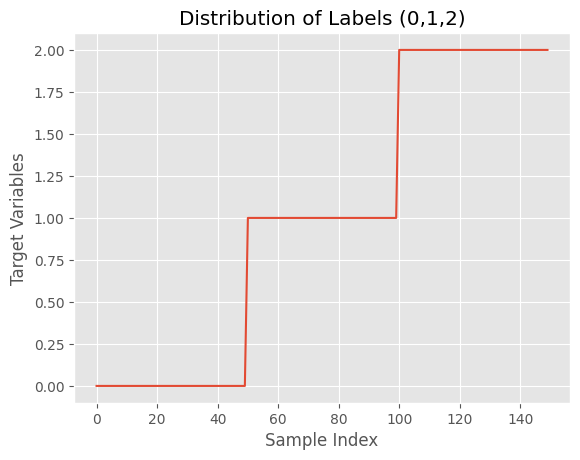

In [54]:
import matplotlib.pyplot as plt

figsize=(7,5)

plt.style.use('ggplot')
plt.plot(np.arange(y.shape[0]), y)
plt.title('Distribution of Labels (0,1,2)')
plt.xlabel('Sample Index')
plt.ylabel('Target Variables')
plt.show()

In [55]:
row_min_seg = 120
row_max_seg = row_min_seg + 3

max_num_thresh = y_oh_3d.shape[1]

thresh_min_seg = max_num_thresh // 2
thresh_max_seg = thresh_min_seg + 3

print('y_oh_3d.shape = ', y_oh_3d.shape)
print('min_segment = ', row_min_seg)
print('max_segment = ', row_max_seg)

print('y_oh_3d(page_zero): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 0])
print('--------------------------------')
print('y_oh_3d(page_one): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 1])
print('--------------------------------')
print('y_oh_3d(page_two): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 2])
print('--------------------------------')

y_oh_3d.shape =  (150, 35, 3)
min_segment =  120
max_segment =  123
y_oh_3d(page_zero): 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
--------------------------------
y_oh_3d(page_one): 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
--------------------------------
y_oh_3d(page_two): 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
--------------------------------


In [56]:
is_left_sampler_3d = np.stack(num_cats * [ is_left_sampler ], axis=2)
is_right_sampler_3d = np.stack(num_cats * [ is_right_sampler ], axis=2)

print(is_left_sampler_3d.shape)
print(is_right_sampler_3d.shape)

(150, 35, 3)
(150, 35, 3)


In [57]:
row_min_seg = 4
row_max_seg = row_min_seg + 3

print('is_left_sampler_3d (page_zero): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 0])
print('--------------------------------')
print('is_left_sampler_3d (page_one): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 1])
print('--------------------------------')
print('is_left_sampler_3d (page_two): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 2])
print('--------------------------------')

is_left_sampler_3d (page_zero): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------
is_left_sampler_3d (page_one): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------
is_left_sampler_3d (page_two): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------


In [58]:
print('is_right_sampler_3d (page_zero): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 0])
print('--------------------------------')
print('is_right_sampler_3d (page_one): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 1])
print('--------------------------------')
print('is_right_sampler_3d (page_two): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 2])
print('--------------------------------')

is_right_sampler_3d (page_zero): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------
is_right_sampler_3d (page_one): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------
is_right_sampler_3d (page_two): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------


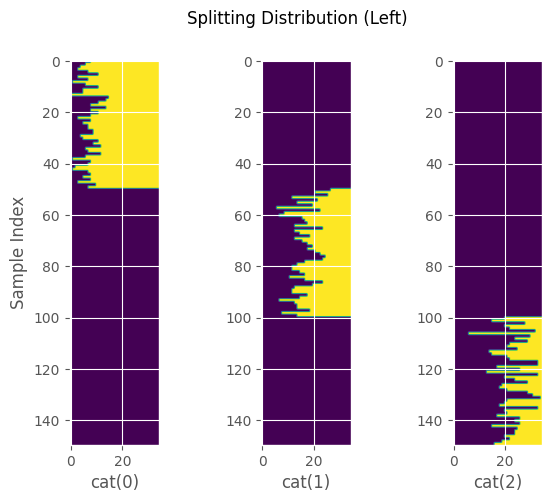

In [72]:
sampled_left = is_left_sampler_3d * y_oh_3d
sampled_right = is_right_sampler_3d * y_oh_3d

figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_left[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_left[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_left[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Left)')
plt.show()



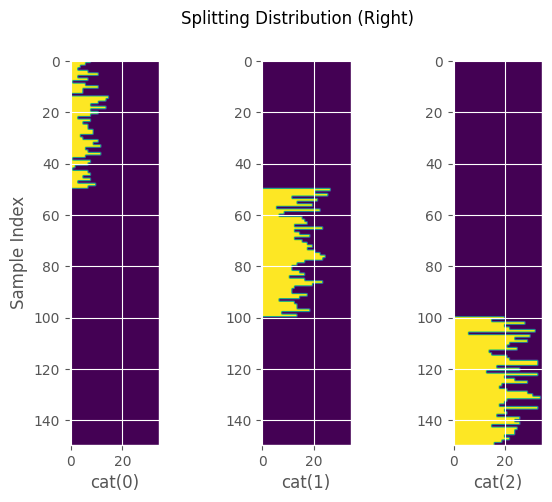

In [73]:

figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_right[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_right[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_right[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Right)')
plt.show()

### We want to compute Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

> $\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

> $G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$


### Question
How to calculate $| D_i |$ first?

#### Answer
- Take the sum of `is_left_sampler` and `is_right_sampler` along the row axis (`axis=0`)

is_left_sampler.shape =  (150, 35)
num_sampled_left.shape =  (35,)

is_right_sampler.shape =  (150, 35)
num_sampled_right.shape =  (35,)


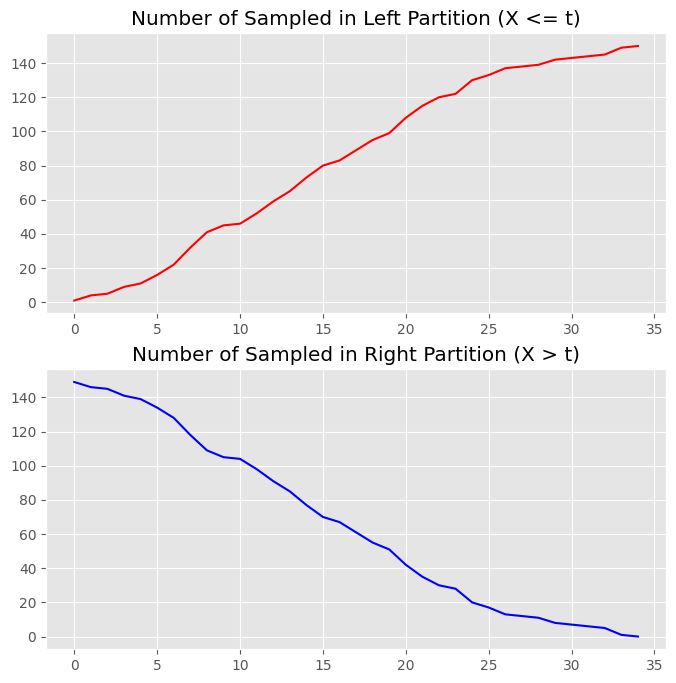

In [82]:
num_sampled_left = np.sum(is_left_sampler, axis=0)
num_sampled_right = np.sum(is_right_sampler, axis=0)

print('is_left_sampler.shape = ', is_left_sampler.shape)
print('num_sampled_left.shape = ', num_sampled_left.shape)
print('')

print('is_right_sampler.shape = ', is_right_sampler.shape)
print('num_sampled_right.shape = ', num_sampled_right.shape)

figsize=(8,8)
fig, (axs1, axs2) = plt.subplots(2,1, figsize=figsize)

axs1.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left, color='red')
axs1.set_title('Number of Sampled in Left Partition (X <= t)')
axs2.plot(np.arange(num_sampled_right.shape[0]), num_sampled_right, color='blue')
axs2.set_title('Number of Sampled in Right Partition (X > t)')
plt.show()

```python
figsize = (5,20)
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=figsize)
axs1.imshow(data_partitions_left[left_feat_cols])
axs1.set_title('Left Subtree')
axs2.imshow(data_partitions_right[right_feat_cols])
axs2.set_title('Right Subtree')
plt.show()
```
